In [1]:
import cv2
import numpy as np

# Step 1. Define detect function
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

# Step 2. Call the cam
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

error: OpenCV(4.4.0) /tmp/pip-req-build-qacpj5ci/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


(-0.5, 1233.5, 719.5, -0.5)

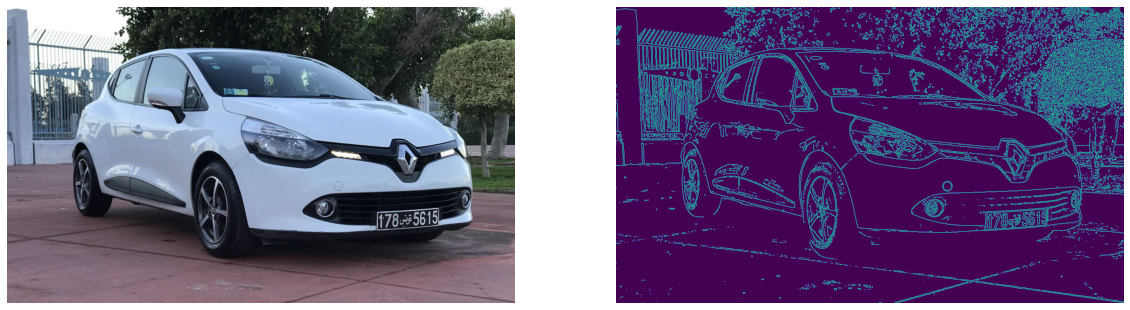

In [9]:
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('data/Image/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Canny detection without blurring
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')


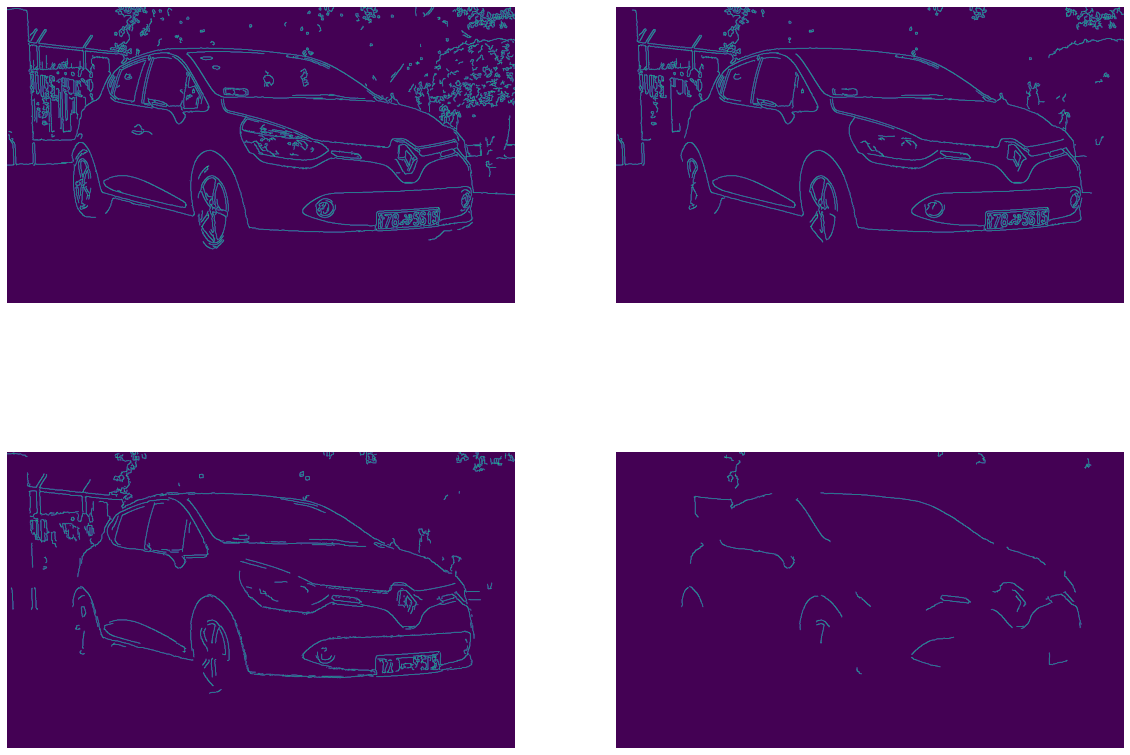

In [10]:
# Set the lower and upper threshold
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))
# Blurring with ksize = 5 
img_k5 = cv2.blur(img, ksize = (5, 5))
# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper+100)
# Blurring with ksize = 9 
img_k9 = cv2.blur(img, ksize = (9, 9))
# Canny detection with different thresholds
edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower, upper+100)
# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()